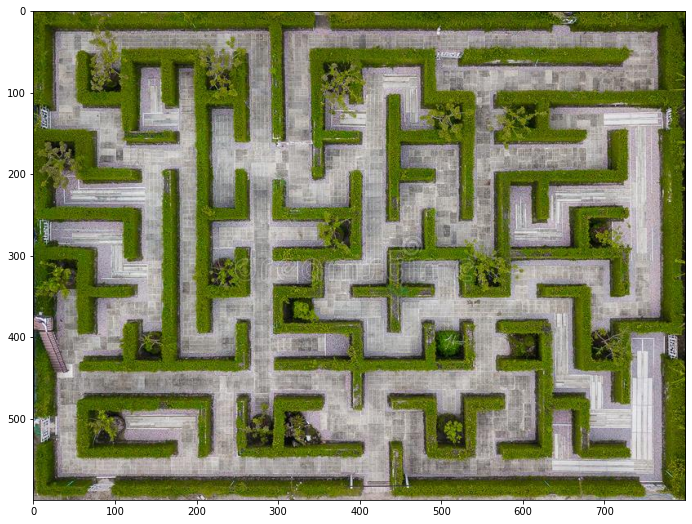

In [1]:
# READ IMAGE

import cv2 
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)
from algorithms import *
from utils.plotting import imshow

DEBUG = False

image1 = cv2.imread('images/maze_2.jpg') 
source_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb)

In [3]:
# THRESHOLDING

def threshold(image):
    h, w = image.shape[:2]
    kernel = int(min(h, w)//22)
    if kernel%2 == 0:
        kernel -= 1
    blur_img = cv2.GaussianBlur(image, (kernel,kernel), 1)
    thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 91, 10)
    return thresh2

# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

def morphological(image):
    h, w = image.shape[:2]
    
    erosion_k = int(min(h, w)//30)
    if erosion_k%2 == 0:
        erosion_k-=1
    
    dilation_k = int(min(h, w)//20)
    if dilation_k%2 == 0:
        dilation_k-=1

    img_erosion = cv2.erode(image, get_kernel(erosion_k), iterations=1)
    img_dilation = cv2.dilate(img_erosion, get_kernel(dilation_k), iterations=1)

    return img_dilation

# RESIZE IMAGE 

def resize_image(image, step):
    h, w = image.shape[:2]
    T = int(step*step*255/1.2)
    new_image = np.full(image.shape, 0)
    for i in range(0, w, step):
        for j in range(0, h, step):
            area = image[j:j+step, i:i+step]
            if np.sum(area) > T:
                new_image[j:j+step, i:i+step] += 255

    resized_img = cv2.resize(new_image, (new_image.shape[1]//step, new_image.shape[0]//step), interpolation = cv2.INTER_LINEAR_EXACT)
    resized_img[resized_img > 0] = 255
    return resized_img

    
def project_solution(h_source, w_source, h_resized, w_resized, solution):
    new_solution = []
    for x, y in solution:
        new_x = int(w_source*x/w_resized)
        new_y = int(h_source*y/h_resized)
        new_solution.append([new_x, new_y])
    return new_solution

def draw_solution(source_image, new_solution):
    rad = min(source_image.shape[0], source_image.shape[1]) //100
    if rad < 1:
        rad = 1
    for x, y in new_solution:
        cv2.circle(source_image, (y, x), rad, (255, 0, 0), -1)
    return source_image


In [4]:
thresh_img = threshold(source_gray)
morph_img = morphological(thresh_img)
resized_img = resize_image(morph_img, step=16)

In [5]:
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!


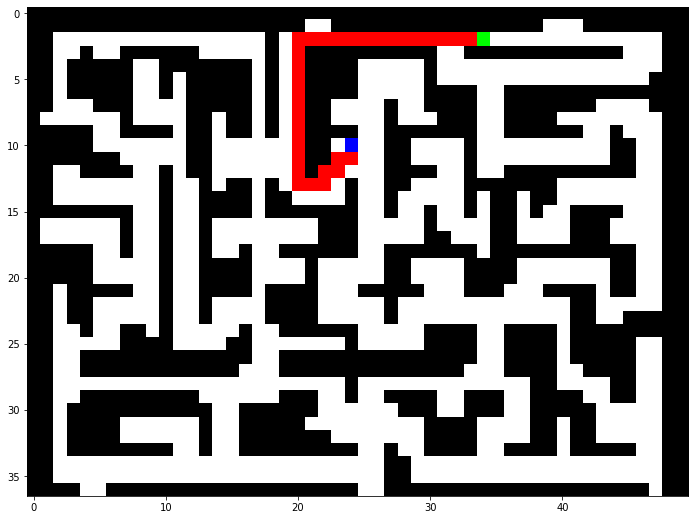

In [6]:
# SOLVE MAZE
start = 2, 34
finish = 10, 24

bfs = BFS(image_maze_gray, start=start, finish=finish)
solution = bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))

In [7]:
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
print(new_solution)

[[32, 551], [32, 535], [32, 518], [32, 502], [32, 486], [32, 470], [32, 454], [32, 437], [32, 421], [32, 405], [32, 389], [32, 372], [32, 356], [32, 340], [32, 324], [48, 324], [64, 324], [80, 324], [96, 324], [112, 324], [128, 324], [144, 324], [160, 324], [176, 324], [192, 324], [208, 324], [208, 340], [208, 356], [192, 356], [192, 372], [176, 372], [176, 389], [160, 389]]


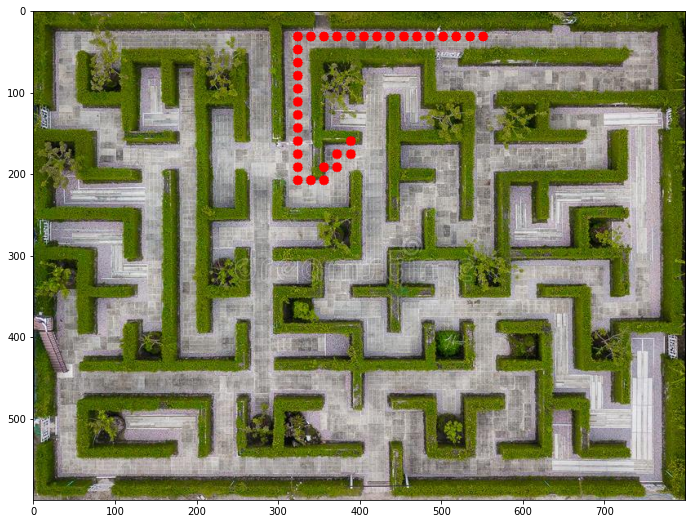

In [8]:
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

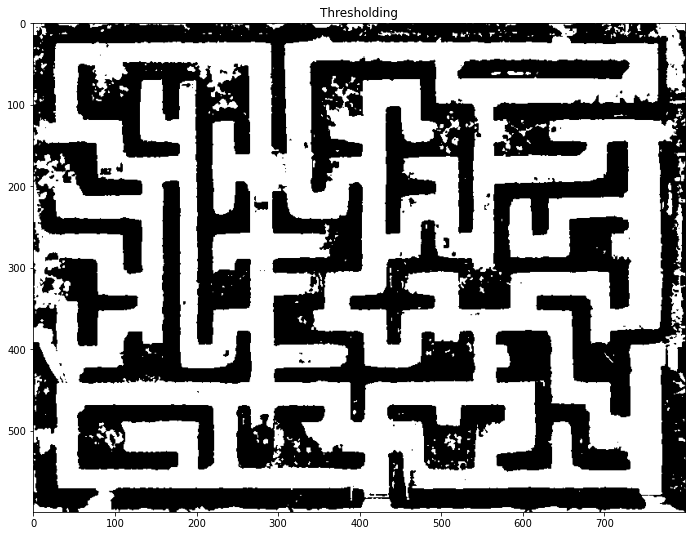

In [10]:
# PRINT INTERMEDIATE RESULTS
plt.title('Thresholding')
plt.imshow(thresh_img, cmap='gray')

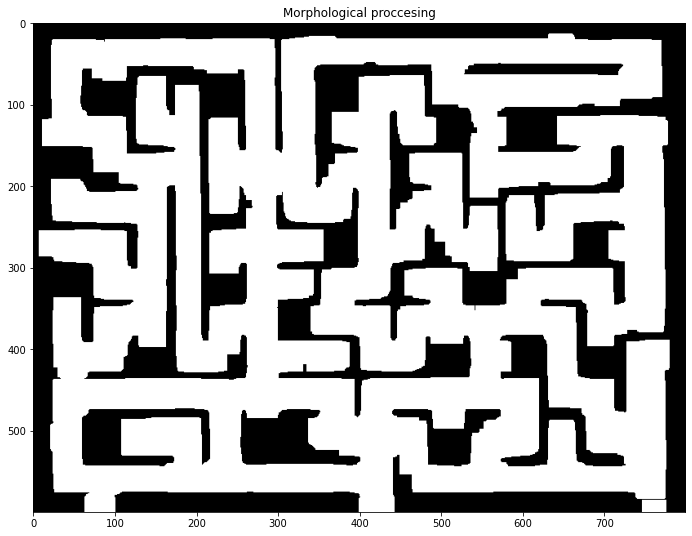

In [11]:
plt.title('Morphological proccesing')
plt.imshow(morph_img, cmap='gray')

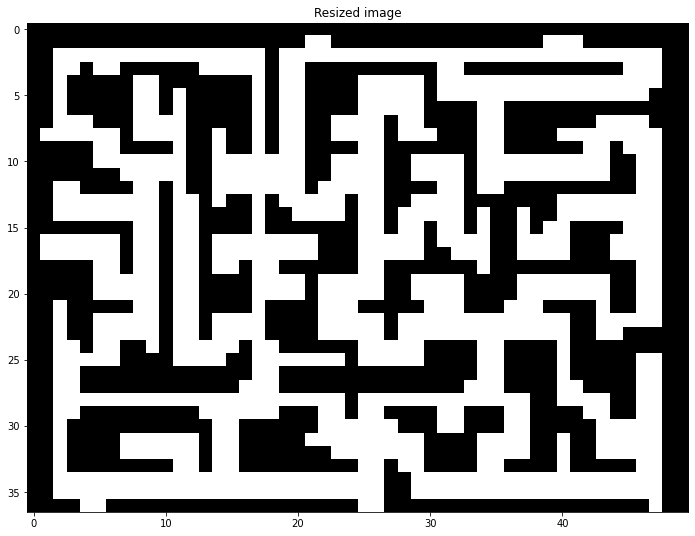

In [12]:
plt.title('Resized image')
plt.imshow(resized_img, cmap='gray')